In [8]:
from pf2barcode.imports import import_CCLE
from anndata import AnnData
import scanpy as sc
import pandas as pd

X = import_CCLE()

# Get rid of cells with no barcode
X = X[X.obs["SW"] != "unknown"]

# remove cells with barcodes having less than 10 cells
good_SW = X.obs["SW"].value_counts().index[X.obs["SW"].value_counts() > 10]
X = X[X.obs["SW"].isin(good_SW)]

/home/asm/.cache/pypoetry/virtualenvs/pf2barcode-Hbu_9TGN-py3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [9]:
pcadata = AnnData(X.obsm["X_pca"], obs=X.obs, var=pd.DataFrame(index=[f'PC{i}' for i in range(1, X.obsm["X_pca"].shape[1] + 1)]))
pcadata.X /= pcadata.X.mean(axis=1, keepdims=True)

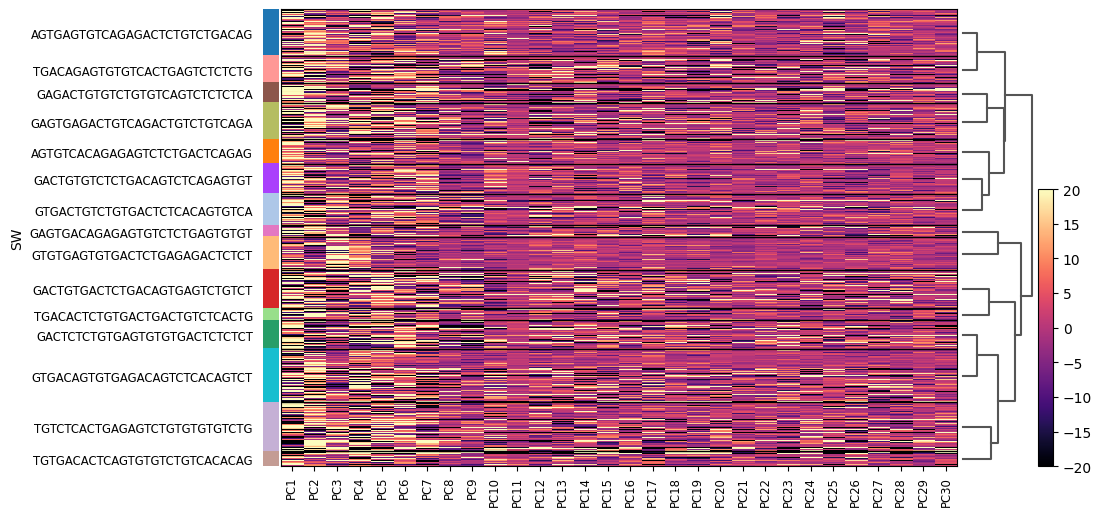

In [10]:
sc.pl.heatmap(pcadata, pcadata.var_names, groupby="SW", dendrogram=True, vmax=20.0, vmin=-20.0, cmap="magma")

In [11]:
X[:, "AXL"].varm["PCs"]

ArrayView([[ 6.24631094e-03, -7.11425897e-03, -1.07976407e-02,
             6.44063242e-03, -4.18266766e-03, -1.11705112e-02,
            -1.27861822e-02, -2.98280829e-03, -1.95005674e-03,
             1.62113717e-02,  7.22537499e-03,  8.74654585e-03,
            -1.08785068e-02, -5.59812209e-03, -6.41902623e-03,
             1.01412656e-02,  2.62635141e-03, -1.34385314e-03,
            -9.29953969e-03,  7.25174943e-03, -6.73721998e-03,
            -3.12376756e-03, -9.90474861e-03, -8.92695675e-03,
             2.26976630e-04,  1.81420188e-05,  7.13930895e-03,
            -5.05282148e-03, -9.06259212e-04, -3.31140392e-03]])

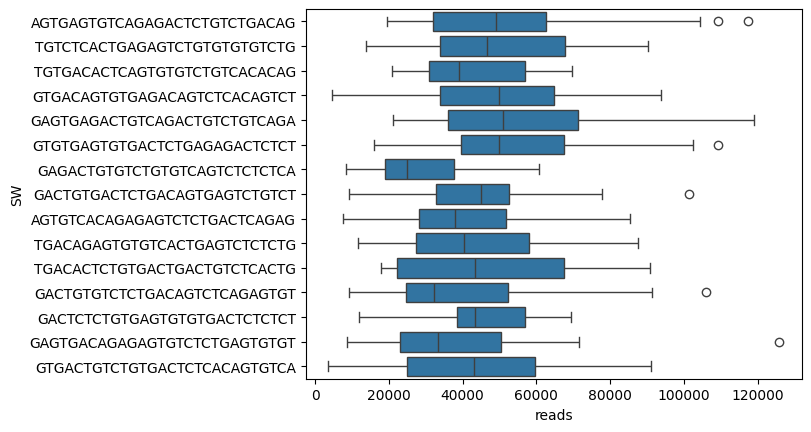

In [12]:
import seaborn as sns

df = pd.DataFrame({"reads": X.obs["n_counts"], "SW": X.obs["SW"]})

sns.boxplot(data=df, x="reads", y="SW");

## Stats

In [13]:
from scipy.stats import f_oneway

comp = pcadata



In [14]:
from gseapy import prerank, dotplot

geneSets = [
        "GO_Biological_Process_2021",
        "GO_Cellular_Component_2021",
    ]

df = prerank(
    pd.Series(H[:, 19], index=X.var_names),
    gene_sets=geneSets,
    organism="Human",
    no_plot=True,
    threads=20,
)

dotplot(df.res2d,
        column="FDR q-val",
        title='KEGG_2016',
        size=6, # adjust dot size
        figsize=(4,5), cutoff=0.25, show_ring=False);

NameError: name 'H' is not defined

In [ ]:
df.res2d.loc[df.res2d["FDR q-val"] < 0.1, :]

In [ ]:
pd.Series(H[:, 20], index=X.var_names).sort_values(ascending=False).head(20)